import libraries

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

1## Data preprocessing 

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
)

Found 70295 files belonging to 38 classes.


## Validation iamge processing

In [5]:
Validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
)

Found 17572 files belonging to 38 classes.


In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
for x,y in training_set:#x=files,y=inside files
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 94.5   94.5  118.5 ]
   [ 89.    89.   113.  ]
   [ 88.5   88.5  112.5 ]
   ...
   [126.   114.   128.  ]
   [133.   121.   135.  ]
   [120.5  108.5  122.5 ]]

  [[ 98.75  98.75 122.75]
   [ 86.    86.   110.  ]
   [ 80.25  80.25 104.25]
   ...
   [115.75 103.75 117.75]
   [119.75 107.75 121.75]
   [125.25 113.25 127.25]]

  [[ 79.5   79.5  103.5 ]
   [ 92.25  92.25 116.25]
   [ 87.    87.   111.  ]
   ...
   [124.5  112.5  126.5 ]
   [130.25 118.25 132.25]
   [126.25 114.25 128.25]]

  ...

  [[123.   136.   170.  ]
   [119.25 132.25 166.25]
   [123.   136.   170.  ]
   ...
   [173.   169.   186.  ]
   [175.   171.   186.  ]
   [175.5  171.5  186.5 ]]

  [[122.25 135.25 169.25]
   [120.75 133.75 167.75]
   [121.5  134.5  168.5 ]
   ...
   [174.5  170.5  187.5 ]
   [175.5  171.5  186.5 ]
   [175.25 171.25 186.25]]

  [[123.5  136.5  170.5 ]
   [123.   136.   170.  ]
   [122.   135.   169.  ]
   ...
   [178.5  174.5  191.5 ]
   [179.   175.   190.  ]
   [178.25 174.25 18

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Flatten , Dropout


In [9]:
model = Sequential()

In [10]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2)) 

In [11]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2)) 

In [12]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2)) 

In [13]:
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2)) 

In [14]:
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2)) 

In [15]:
###from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, MaxPooling2D
# Add layers
#model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', input_shape=(128,128, 3)))
#model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
##model.add(MaxPooling2D(pool_size=2, strides=2))


In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(units=1024,activation='relu'))

In [18]:

model.add(Dense(units=38,activation='softmax'))

In [19]:
pip install tf_keras

Note: you may need to restart the kernel to use updated packages.


In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          38,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,849,350 (26.13 MB)

 Trainable params: 6,849,350 (26.13 MB)

 Non-trainable params: 0 (0.00 B)

training dataset

In [22]:
training_history = model.fit
(training_set,validation_data=Validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5940s 3s/step - accuracy: 0.5118 - loss: 1.7112 - val_accuracy: 0.8455 - val_loss: 0.4774
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3476s 2s/step - accuracy: 0.8776 - loss: 0.3791 - val_accuracy: 0.9007 - val_loss: 0.2974
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3282s 1s/step - accuracy: 0.9319 - loss: 0.2087 - val_accuracy: 0.9240 - val_loss: 0.2396
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3676s 2s/step - accuracy: 0.9522 - loss: 0.1419 - val_accuracy: 0.9417 - val_loss: 0.1926
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 13339s 6s/step - accuracy: 0.9649 - loss: 0.1030 - val_accuracy: 0.9305 - val_loss: 0.2308
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3462s 2s/step - accuracy: 0.9722 - loss: 0.0822 - val_accuracy: 0.9402 - val_loss: 0.1946
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4989s 2s/step - accuracy: 0.9770 - loss: 0.0690 - val_accuracy: 0.9523 - val_loss: 0.1761
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4739s 2s/step - accuracy: 0.9798 

model Evaluation

In [23]:
train_loss,train_acc = model.evaluate(training_set)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 882s 401ms/step - accuracy: 0.9888 - loss: 0.0323


In [24]:
print(train_loss,train_acc)

0.031050685793161392 0.9900277256965637


In [28]:
val_loss,val_acc = model.evaluate(Validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 187s 339ms/step - accuracy: 0.9573 - loss: 0.1750


In [29]:
print(val_loss,val_acc)

0.17109952867031097 0.9564648270606995


Saving model

In [31]:
model.save("trained_model.keras")

In [34]:
training_history.history

{'accuracy': [0.69460129737854,
  0.8945159912109375,
  0.9378761053085327,
  0.9571520090103149,
  0.9668682217597961,
  0.9745358824729919,
  0.978519082069397,
  0.9809374809265137,
  0.984209418296814,
  0.9857600331306458],
 'loss': [1.020700216293335,
  0.32498738169670105,
  0.19185549020767212,
  0.1283636838197708,
  0.09861266613006592,
  0.07759655267000198,
  0.06414780020713806,
  0.05866049602627754,
  0.0485893115401268,
  0.044249918311834335],
 'val_accuracy': [0.8455497622489929,
  0.9006943106651306,
  0.9239699244499207,
  0.941725492477417,
  0.9305144548416138,
  0.9402458667755127,
  0.9522535800933838,
  0.945538341999054,
  0.9585704803466797,
  0.9564648270606995],
 'val_loss': [0.4774436354637146,
  0.29741451144218445,
  0.23955227434635162,
  0.19259537756443024,
  0.2307559996843338,
  0.19460172951221466,
  0.1760946661233902,
  0.17336654663085938,
  0.14348247647285461,
  0.17109964787960052]}

#recording history in json

In [36]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [37]:
training_history.history['accuracy']

[0.69460129737854,
 0.8945159912109375,
 0.9378761053085327,
 0.9571520090103149,
 0.9668682217597961,
 0.9745358824729919,
 0.978519082069397,
 0.9809374809265137,
 0.984209418296814,
 0.9857600331306458]

In [38]:
training_history.history['val_accuracy']

[0.8455497622489929,
 0.9006943106651306,
 0.9239699244499207,
 0.941725492477417,
 0.9305144548416138,
 0.9402458667755127,
 0.9522535800933838,
 0.945538341999054,
 0.9585704803466797,
 0.9564648270606995]

Accuracy visualization

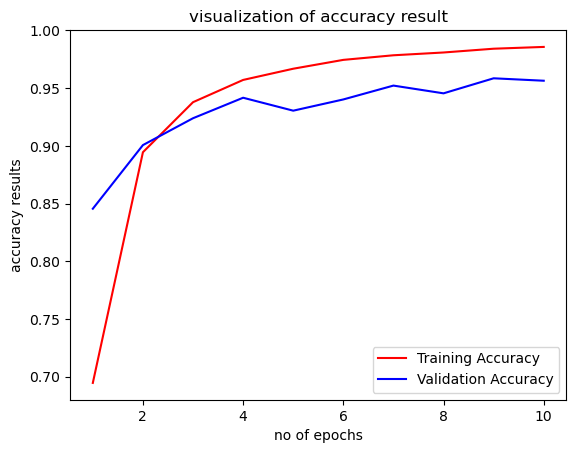

In [39]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("no of epochs")
plt.ylabel("accuracy results")
plt.title("visualization of accuracy result")
plt.legend()
plt.show()

some other metrics for model evaluation

In [40]:
class_name = Validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [41]:
test_set =  tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [42]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 234s 420ms/step


(array([[1.00000000e+00, 1.92909377e-09, 1.02175645e-14, ...,
         4.56161658e-23, 2.29854509e-21, 1.60820406e-20],
        [9.47803974e-01, 5.21933362e-02, 3.34873629e-10, ...,
         6.17070331e-16, 4.93117916e-14, 1.10690916e-13],
        [9.99999881e-01, 6.35888568e-08, 9.26764308e-13, ...,
         2.62696109e-23, 1.46664641e-19, 3.81669684e-16],
        ...,
        [1.70491540e-12, 1.23645595e-16, 6.70903610e-12, ...,
         1.38659077e-13, 8.44297708e-15, 9.99999881e-01],
        [3.04839626e-10, 1.55876370e-13, 5.07821118e-10, ...,
         8.22455559e-12, 1.65238569e-12, 9.99998450e-01],
        [6.26015003e-18, 2.13971379e-18, 4.63831106e-17, ...,
         1.13453469e-19, 9.78038901e-17, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [66]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [67]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [68]:
true_categories = tf.concat([y for x,y in test_set] , axis=0)
true_categories

<tf.Tensor: shape=(17572,), dtype=int32, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [69]:
true_categories

<tf.Tensor: shape=(17572,), dtype=int32, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [77]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

InvalidArgumentError: {{function_node __wrapped__ArgMax_device_/job:localhost/replica:0/task:0/device:CPU:0}} Expected dimension in the range [-1, 1), but got 1 [Op:ArgMax] name: 

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
classification_report(Y_true,predicted_categories,target_names=class_name)

TypeError: Singleton array <tf.Tensor: shape=(), dtype=int64, numpy=17091> cannot be considered a valid collection.

In [75]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

TypeError: Singleton array <tf.Tensor: shape=(), dtype=int64, numpy=17091> cannot be considered a valid collection.

##Confusion matrix visuallization

In [76]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("predicted class ", fontsize=20)
plt.ylabel("actual class ", fontsize=20)
plt.title("plant disesse prediction confusion matrix ", fontsize=20)
plt.show()

NameError: name 'cm' is not defined

<Figure size 4000x4000 with 0 Axes>